# KNN From Scratch

In this workbook we will guide you through the steps to implement KNN from scratch. Once this is done you'll implement you solution in a class that is tested with the knn_class_tester notebook.

1. Use the ```make_blobs``` function from SKLearn to make a dataset to test your KNN functions.
2. Create helper functions. These will be useful when you go to implement your class.
    - Squaring the difference of two vectors.
    - Summing the square differences and returning the square root.
    - Calculating the euclidian distances
    - An evaluation function to evalaute predictions
3. Create the KNN predcit function

In [4]:
#import libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Step 1: Create a sample dataset
1. Use ```make_blobs``` to create a sample set
2. Start with 300 samples, 4 centres, 0.6 standard deviation, and random state 0
3. Plot the samples

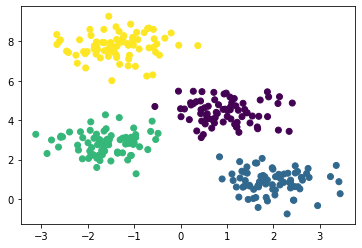

In [8]:
#make the dataset with make_blobs
X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X[:,0],X[:,1],c=y)

# Step 2: Creating the KNN function
Pseudocode below to help out! Note: **IT IS NOT ACTUAL CODE**

In [10]:
# define train test split
#X_train: each pair of coordinates in the dataset
#X_test: new pair coordinates we want to classify
#y_train: labels in the dataset
#y_test: new points labels we have to find out

In [23]:
def get_eucledian_distance(v1,v2):
    distance = 0
    for i, j in zip(v1, v2):
        distance += (i-j)**2
    return np.sqrt(distance)

In [67]:
def get_all_distances(X_train, X_test):
    return [(i,get_eucledian_distance(X_train[i],X_test)) for i in range(0,len(X_train))]
get_all_distances(X,(1,1))

[(0, 1.1480105938279388),
 (1, 6.849015654170321),
 (2, 4.102556021817868),
 (3, 7.107592664502782),
 (4, 0.9328788402314347),
 (5, 2.5469852456701085),
 (6, 2.8709830440025255),
 (7, 3.406394912126171),
 (8, 7.529138207755668),
 (9, 7.8492151970093715),
 (10, 3.243076694591332),
 (11, 8.218800203229206),
 (12, 3.512379300294606),
 (13, 6.7206836075077065),
 (14, 1.1253450411801165),
 (15, 3.0065100676330863),
 (16, 3.531363675467419),
 (17, 1.6449652479162105),
 (18, 2.969186162446841),
 (19, 2.4023733426774703),
 (20, 1.7395457531858938),
 (21, 0.7991881539293388),
 (22, 4.045983857802787),
 (23, 3.522428744680355),
 (24, 3.3306043957562426),
 (25, 4.009958035586384),
 (26, 0.7102112842161401),
 (27, 3.731715504975065),
 (28, 4.093615104668075),
 (29, 3.134191249080192),
 (30, 7.03897659989685),
 (31, 7.073244133259799),
 (32, 3.2982479927064636),
 (33, 6.14775181592184),
 (34, 7.427588671871986),
 (35, 7.291046283588967),
 (36, 7.151331365755868),
 (37, 7.8691698997488375),
 (38, 3.

In [69]:
def select_neighbours(dist_list, k):
    sl = sorted(dist_list, key=lambda x:x[1])
    k_list = [0]*k+[1]*(len(dist_list)-k)
    return list(zip(sl,k_list))
selected = select_neighbours(get_all_distances(X,(1,1)),3)

In [80]:
def predict(final_n, y_train):
    indexes = [i[0][0] for i in final_n if i[1]==0]
    y_final = Counter(y[indexes]).most_common(1)[0][0]
    return y_final
predict(selected,y)

1

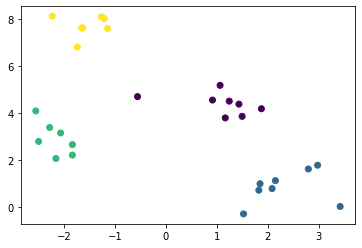

In [105]:
def KNN_function (X_train, X_test, y_train, y_test, k):
    # given a vector, [2.5, 4.56, 2]
    # sample X_train : [2.5,4.56] = x1,x2
    # search with same index: y_train = 2
    
    # rember to do it for all X_test vectors
    # CASE: ONE SINGLE X_train vector:
    y_preds = []
    for test in X_test:
        dist_list = get_all_distances(X_train, test)
        final_n = select_neighbours(dist_list, k)
        ypred = predict(final_n, y_train)
        y_preds.append(ypred)
    score = 0
    for i,v in zip(y_preds,y_test):
        score += abs(i-v)
    return y_preds,score


X_test,y_test = make_blobs(n_samples=30,centers=4,cluster_std=0.6,random_state=0)
plt.scatter(X_test[:,0],X_test[:,1],c=KNN_function(X, X_test, y, y_test, 3)[0])

    
        